# BagOfWords approach for classification

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import string
import time
import os
import mlflow

In [44]:
ENGLISH_STOP_WORDS = {'all', 'both', 'am', 'themselves', 'often', 'if', 'becoming', 'thence', 'while', 've', 'couldn', 'mostly', 'ma', 'more', 'de', 'thin', 'seems', 'do', 'sometime', 'across', 'nine', 'namely', 'hers', 'amoungst', 'needn', 'sixty', 'what', 'why', 'nevertheless', 'co', 'mustn', 'bottom', 'although', 'own', 'having', 'was', 'cant', 'from', 'll', 'etc', 'on', 'herself', 'had', 'beforehand', 'empty', 'they', 'less', 'seem', 'hasnt', 'he', 'serious', 'himself', 'whereafter', 'is', 'over', 'became', 'give', 'below', 'ain', 'yourselves', 'each', 'anyhow', 'one', 'moreover', 'where', 'might', 'already', 're', 'until', 'that', 'theirs', 'anywhere', 'other', 'through', 'should', 'at', 'fifteen', 'sometimes', 'bill', 'upon', 'describe', 'perhaps', 'after', 'there', 'not', 'whereas', 'around', 'this', 'eg', 'call', 'ours', 'can', 'who', 'besides', 'same', 'to', 'seemed', 'your', 'thick', 'whereupon', 'anyone', 'when', 'wasn', 'whoever', 'haven', 'be', 'either', 'rather', 'inc', 'has', 'ie', 'twenty', 'amongst', 'about', 'none', 'however', 'the', 'system', 'been', 'still', 'otherwise', 'two', 'whenever', 'their', 'because', 'but', 'y', 'for', 'former', 'which', 'due', 'i', 'does', 'onto', 'him', 'five', 'doesn', 'nowhere', 'of', 'those', 'behind', 'hereupon', 'latter', 'too', 'move', 'us', 'them', 'just', 'as', 'everything', 'any', 'everywhere', 'it', 'get', 'hadn', 'much', 'find', 'something', 'won', 'always', 'fire', 'couldnt', 'ourselves', 'yet', 'almost', 'now', 'twelve', 'mightn', 'o', 'under', 'some', 'no', 'eight', 'somewhere', 'together', 'anything', 'within', 'don', 'beside', 'most', 'mill', 'nothing', 'sincere', 'per', 'many', 'nor', 'thru', 'into', 'beyond', 'have', 'than', 'weren', 'therein', 'ten', 'its', 'take', 'towards', 'very', 'with', 'm', 'cry', 'also', 'were', 'since', 'ltd', 'whose', 'several', 'between', 'how', 'become', 'itself', 'here', 'formerly', 'in', 'back', 'becomes', 'thereupon', 'else', 'didn', 'third', 'without', 'name', 'whence', 'among', 'ever', 'first', 'keep', 'made', 'you', 'least', 'amount', 'an', 'except', 'whole', 'up', 'next', 'fify', 'someone', 'aren', 'interest', 'others', 'part', 'noone', 'throughout', 'found', 'thereafter', 'thus', 'must', 'yours', 'only', 'by', 'wherever', 'during', 'her', 'could', 'cannot', 'full', 'd', 'hundred', 'myself', 'herein', 'seeming', 'or', 'isn', 'elsewhere', 'side', 'well', 'then', 'done', 'hereby', 'may', 'off', 'go', 'being', 'once', 'put', 'indeed', 'enough', 'con', 'please', 'eleven', 'few', 'whereby', 'my', 'whether', 'detail', 'meanwhile', 'our', 'so', 'another', 'such', 'see', 'down', 'shan', 'neither', 'hence', 'will', 'never', 'mine', 'wouldn', 'somehow', 'whither', 'every', 'even', 'a', 'along', 'front', 'hereafter', 'are', 'forty', 'nobody', 'before', 'therefore', 'we', 'fill', 'four', 'three', 'alone', 'hasn', 't', 'afterwards', 'yourself', 'would', 'shouldn', 'six', 'against', 'anyway', 'wherein', 'doing', 'last', 'again', 'me', 'his', 'and', 'whom', 'whatever', 'thereby', 'she', 'above', 'further', 'these', 'top', 'via', 'though', 'out', 'un', 's', 'show', 'toward', 'everyone', 'latterly', 'did'}

In [45]:
#Function for basic cleaning/preprocessing texts
def clean(doc):
    # Removal of punctuation marks (.,/\][{} etc) and numbers
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # Removal of stopwords
    doc = " ".join([token for token in doc.split() if token not in ENGLISH_STOP_WORDS])
    # Removal of accents
    doc = doc.encode('ascii', 'ignore').decode('ascii')
    # Removal of whitespaces
    doc = " ".join(doc.split())
    # Lowercasing
    return doc.lower()

In [46]:
# MODELS for text classification

models = {
    "Logistic Regression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Support Vector Machine": svm.SVC(kernel='linear', C=1, probability=True)
}


In [47]:
csvFile = "E:\\mladhd\\datasets\\text\\data_clean_large.csv"

In [48]:
df = pd.read_csv(csvFile, sep=';')

In [49]:
df

,class,text,image
0,0,© From your Google Drive Interview-Mode BK99 S...,focused_Algorithms_one_0.jpg
1,0,=] Computatior] ] + File Edit View Insert Form...,focused_Algorithms_one_1.jpg
2,0,= 401 Computational Geometry File Edit View ...,focused_Algorithms_one_10.jpg
3,0,= 401 Computational Geometry File Edit View ...,focused_Algorithms_one_100.jpg
4,0,= 401 Computational Geometry File Edit View ...,focused_Algorithms_one_101.jpg
...,...,...,...
11696,1,"comment Add 2,859 Comments = Sort by 17M views...",distracted_youtube_partial_3090.jpg
11697,1,6 key moments in this video YouTube - Red Bull...,distracted_youtube_partial_3091.jpg
11698,1,“a. Add a comment 666 Comments Sort by Today w...,distracted_youtube_partial_3092.jpg
11699,1,Learn more IZ I Sz il Universit) 13M views 1 y...,distracted_youtube_partial_3093.jpg


In [50]:
# count NaN values in each column
df.isnull().sum()

class     0
text     95
image     0
dtype: int64

In [51]:
# dataframe with the rows that have NaN values
nan_df = df[df.isnull().any(axis=1)]

In [52]:
# drop rows with NaN values
df = df.dropna()

In [53]:
vectorizer = TfidfVectorizer(preprocessor=clean)
# Create sample set of documents
docs = df.text.to_numpy()

In [54]:
# Fit the TFIDF (BoW + idf) model
idf_bag = vectorizer.fit_transform(docs)
idf_bag.shape

(11606, 101925)

In [55]:
# Get unique words / tokens found in all the documents. The unique words / tokens represents
# the features
print(len(vectorizer.get_feature_names_out()))

101925


In [56]:
# Associate the indices with each unique word
print(vectorizer.vocabulary_)


{'from': 34199, 'google': 36846, 'drive': 24976, 'interviewmode': 45635, 'bk': 10227, 'ses': 79380, 'es': 29231, 'session': 79411, 'canvas': 13070, 'sion': 80922, 'oc': 61386, 'go': 36523, 'my': 57597, 'web': 97583, 'store': 84610, 'add': 1281, 'shortcut': 80175, 'gm': 36444, 'image': 43672, 'account': 740, 'dashboard': 20828, 'calendar': 12617, 'oe': 61668, 'commons': 17131, 'help': 39297, 'ie': 43027, 'assignments': 6501, 'virginiacommonwealthinstructure': 95891, 'adob': 1536, 'mec': 54435, 'hal': 38398, 'adi': 1417, 'je': 47465, 'alg': 2992, 'ra': 71818, 'eativ': 25876, 'ort': 63849, 'cmsc': 16243, 'computational': 17447, 'geometry': 35621, 'due': 25250, 'monday': 56519, 'prr': 70508, 'here': 39440, 'slide': 81433, 'lecture': 50492, 'pre': 69146, 'signme': 80582, 'cor': 18586, 'points': 68235, 'none': 60063, 'next': 59278, 'computatior': 17449, 'file': 32458, 'edit': 26304, 'view': 95653, 'insert': 45178, 'forma': 33612, 'it': 46644, 'cs': 19758, 'ogle': 61968, 'coit': 16679, 'norma

In [57]:
# Print the numerical feature vector
print(idf_bag.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
# Creating training data
X = idf_bag.toarray()
y = df["class"].to_numpy()

In [59]:
# Create training and test split
train_split = 0.8
test_split = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_split)

## Choose a model

In [60]:
model_name = "Logistic Regression" # "Logistic Regression" or "Multinomial Naive Bayes"
model = models[model_name]

In [61]:
mlflow.set_experiment(experiment_name="MLADHD_Experiments_Text")
mlflow.start_run()
mlflow.log_param("model", model_name)
mlflow.log_param("dataset", csvFile)
mlflow.log_param("data_size", len(df))
mlflow.log_param("data_split", str((train_split, test_split)))

'(0.8, 0.2)'

In [62]:
# Fit the model
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print(f"Training time: {end - start}")
mlflow.log_metric("training_time", end - start)

Training time: 33.852999210357666


In [63]:
# Create the predictions
y_predict = model.predict(X_test)

In [64]:
# Iterate over the nan_df and add wrong predictions to the dataframe
# If no text is provided, the prediction is 0 (focused as default)
for index, row in nan_df.iterrows():
    real_class = row["class"]
    y_test = np.append(y_test, real_class)
    y_predict = np.append(y_predict, 0)

Model accuracy:  0.9383533305750931
Model precision:  0.9836660617059891
Model recall:  0.7947214076246334
Model f1-score:  0.8791565287915653


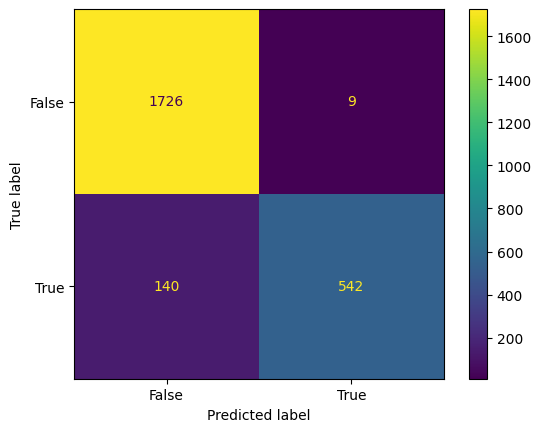

In [65]:
# Compute the accuracy, precision, recall and f1-score
print("Model accuracy: ", metrics.accuracy_score(y_test, y_predict))
print("Model precision: ", metrics.precision_score(y_test, y_predict))
print("Model recall: ", metrics.recall_score(y_test, y_predict))
print("Model f1-score: ", metrics.f1_score(y_test, y_predict))
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
mlflow.log_metric("accuracy", metrics.accuracy_score(y_test, y_predict))
mlflow.log_metric("precision", metrics.precision_score(y_test, y_predict))
mlflow.log_metric("recall", metrics.recall_score(y_test, y_predict))
mlflow.log_metric("f1-score", metrics.f1_score(y_test, y_predict))
# Visualize the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [66]:
# Save the model
run = mlflow.active_run()
#print("Active run_id: {}".format(run.info.run_id))
#path = os.path.join(os.getcwd(), "..", "models", "text", run.info.run_id)
mlflow.sklearn.log_model(model, "model")

## Interpretability

In [67]:
model.coef_

array([[ 0.37494638,  0.12249708,  0.00784355, ..., -0.01030274,
         0.01653594,  0.        ]])

In [68]:
# Assigning the feature names to an empty list
feat_impts = [vectorizer.get_feature_names_out()]
#For all the models save the feature importances in the estimators list would give the internal models used by the #multioutput regressor
for clf in model.coef_:
    #For each model in the estimators list, save the feature importances in the feat_impts list
    feat_impts.append(clf)

In [69]:
#Saving the coefficients in a dataframe
df_feats_impts = pd.DataFrame(np.transpose(np.array(feat_impts)), columns = ["word", "distracted"])

In [70]:
#Creating Individual Feature Importance table by sorting on specific distracted-type column and selecting top 20 words
distracted_fi = df_feats_impts[["word","distracted"]].sort_values(by = "distracted", ascending = False).head(20)

In [71]:
distracted_fi

,word,distracted
34878,game,3.274395
56702,more,3.211085
97238,washington,3.098035
62885,oo,2.96446
92143,ues,2.821552
90791,trending,2.600845
75206,richmond,2.583913
53049,made,2.386206
9405,best,2.382447
78717,seiko,2.337376


In [72]:
#Creating Individual Feature Importance table by sorting on specific focused-type column and selecting top 20 words
focused_fi = df_feats_impts[["word","distracted"]].sort_values(by = "distracted").head(20)
# Rename the column
focused_fi = focused_fi.rename(columns={"distracted": "focused"})

In [73]:
focused_fi

,word,focused
32458,file,-3.068896
20828,dashboard,-2.75777
101760,zoom,-2.669965
71599,question,-2.606522
44168,inbox,-2.589464
26304,edit,-2.505009
39297,help,-2.44664
24976,drive,-2.425593
13070,canvas,-2.380871
95653,view,-2.236661


In [74]:
# Log the first 20 distracted words
mlflow.log_param("distracted_words", distracted_fi.word.to_list())
# Log the first 20 focused words
mlflow.log_param("focused_words", focused_fi.word.to_list())

['file',
 'dashboard',
 'zoom',
 'question',
 'inbox',
 'edit',
 'help',
 'drive',
 'canvas',
 'view',
 'what',
 'course',
 'google',
 'calendar',
 'lecture',
 'vcu',
 'untitled',
 'courses',
 'printing',
 'learning']

In [75]:
# Log the vectorizer
mlflow.sklearn.log_model(vectorizer, "vectorizer")

2023/05/01 11:48:32 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


In [76]:
mlflow.end_run()